In [43]:
df.to_pickle("pickled_parquet_2.pkl")

# Univariate analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as  plt
from datetime import timedelta
import seaborn as sns

In [2]:
df = pd.read_pickle('pickled_parquet_1.pkl')

In [7]:
df.skew()

/tmp/ipykernel_3649/1665899112.py:1: FutureWarning: The default value of numeric_only in DataFrame.skew is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.skew()


VendorID              0.469472
passenger_count       2.217421
trip_distance         3.008637
RatecodeID          115.177326
PULocationID         -0.271029
DOLocationID         -0.325737
payment_type          1.005700
fare_amount           2.860210
total_amount          3.341880
total_sec          -189.344923
PUmonth               0.000000
DOmonth            1394.223440
PUhour               -0.470174
DOhour               -0.491009
PUdayno               0.350679
dtype: float64

In [8]:
col_names = df.columns
col_names

Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID', 'store_and_fwd_flag',
       'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount',
       'total_amount', 'total_sec', 'duration', 'PUmonth', 'DOmonth', 'PUday',
       'DOday', 'PUhour', 'DOhour', 'PUtime', 'DOtime', 'PUZone', 'DOZone',
       'PUdayno'],
      dtype='object')

In [40]:
df.drop(['PUZone','DOZone'],axis=1,inplace=True)

In [41]:
df['PUdayno'] = df['tpep_pickup_datetime'].dt.dayofweek

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1514293 entries, 0 to 1999998
Data columns (total 23 columns):
 #   Column                 Non-Null Count    Dtype          
---  ------                 --------------    -----          
 0   VendorID               1514293 non-null  int64          
 1   tpep_pickup_datetime   1514293 non-null  datetime64[ns] 
 2   tpep_dropoff_datetime  1514293 non-null  datetime64[ns] 
 3   passenger_count        1514293 non-null  float64        
 4   trip_distance          1514293 non-null  float64        
 5   RatecodeID             1514293 non-null  float64        
 6   store_and_fwd_flag     1514293 non-null  object         
 7   PULocationID           1514293 non-null  int64          
 8   DOLocationID           1514293 non-null  int64          
 9   payment_type           1514293 non-null  int64          
 10  fare_amount            1514293 non-null  float64        
 11  total_amount           1514293 non-null  float64        
 12  total_sec     

<AxesSubplot: ylabel='VendorID'>

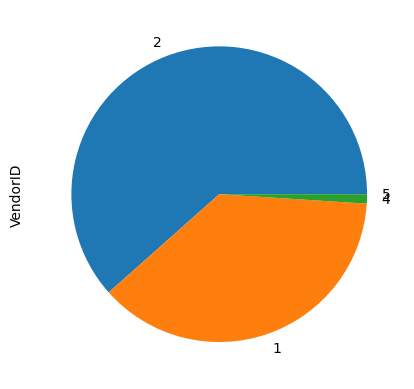

In [20]:
df['VendorID'].value_counts().plot.pie()

In [8]:
df['RatecodeID'].value_counts()

1.0     1884711
2.0       46627
5.0        9205
3.0        3127
4.0         157
99.0         27
6.0           5
Name: RatecodeID, dtype: int64

<AxesSubplot: >

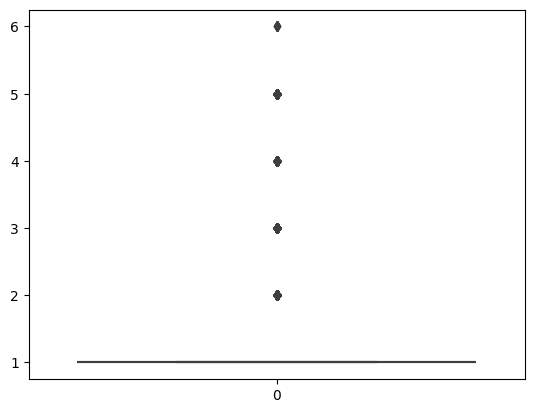

In [10]:
df.drop(df[df.RatecodeID >6].index,inplace=True)
sns.boxplot(df.RatecodeID)

In [10]:
df['passenger_count'].value_counts()

1.0    1363467
2.0     292274
3.0      84672
5.0      84511
6.0      52579
4.0      40035
0.0      26290
8.0          2
7.0          2
Name: passenger_count, dtype: int64

In [11]:
df.passenger_count.isnull().sum()

0

0 passenger count 107177. 28111 null values in passenger count.

In [3]:
#autofill passenger count as 1 if NAN

df.passenger_count = df.passenger_count.fillna(1)


In [12]:
df.skew()

/tmp/ipykernel_3649/1665899112.py:1: FutureWarning: The default value of numeric_only in DataFrame.skew is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.skew()


VendorID              0.469350
passenger_count       2.217408
trip_distance         3.008617
RatecodeID            9.656327
PULocationID         -0.271027
DOLocationID         -0.325731
payment_type          1.005746
fare_amount           2.860203
total_amount          3.341875
total_sec          -189.343638
PUmonth               0.000000
DOmonth            1394.213757
PUhour               -0.470171
DOhour               -0.491009
PUdayno               0.350672
dtype: float64

<AxesSubplot: xlabel='passenger_count', ylabel='count'>

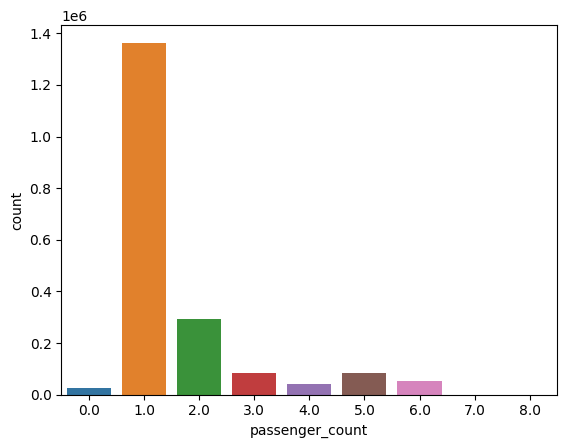

In [11]:
sns.countplot(data=df, x='passenger_count')

.

.

## let us remove the outliers from total_sec variable

{'whiskers': [<matplotlib.lines.Line2D at 0x7f1268b8fa60>,
 'caps': [<matplotlib.lines.Line2D at 0x7f1268b8ffa0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f1268b8f7c0>],
 'medians': [<matplotlib.lines.Line2D at 0x7f1268bb4520>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f1268bb47c0>],
 'means': []}

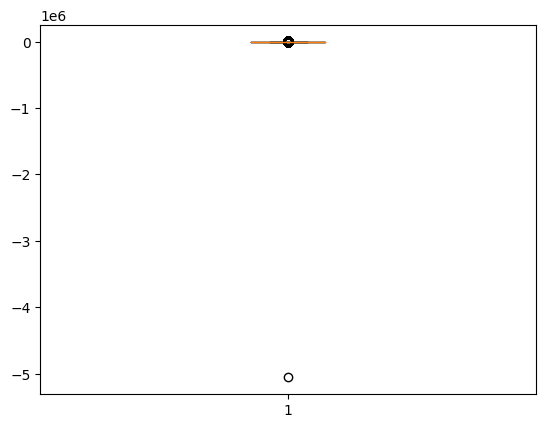

In [11]:
plt.boxplot(df['total_sec'])

In [6]:
df.drop(df[df.total_sec<-1e6].index,inplace=True)
df.drop(df[df.total_sec>1e6].index,inplace=True)

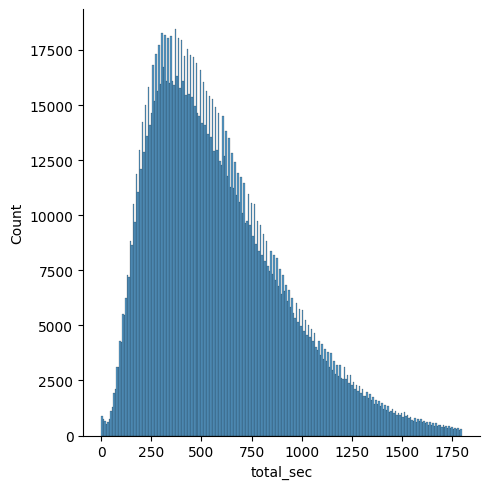

In [13]:
sns.displot(df['total_sec'])

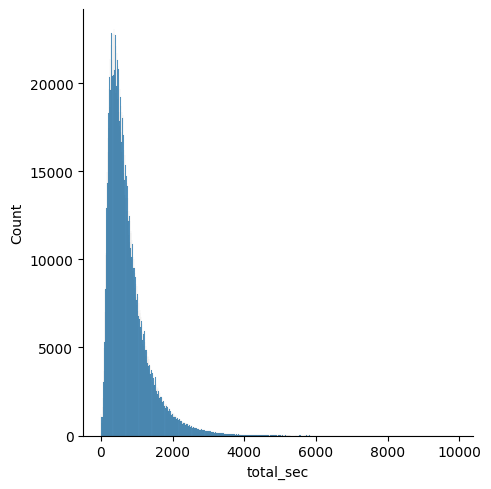

In [27]:
df.drop(df[df.total_sec>1e4].index,inplace=True)
sns.displot(df.total_sec)

In [14]:
df.drop(df[df.total_sec>4000].index,inplace=True)

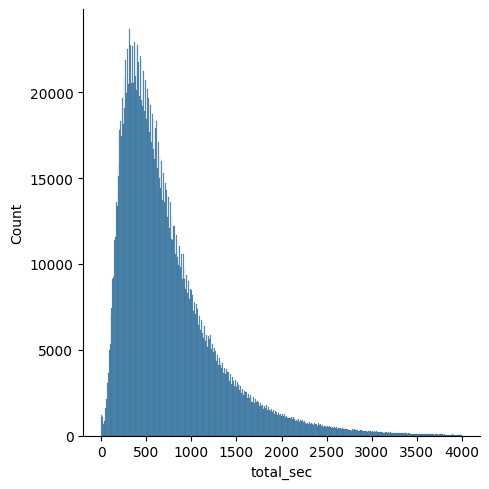

In [16]:
sns.displot(df.total_sec)

<AxesSubplot: >

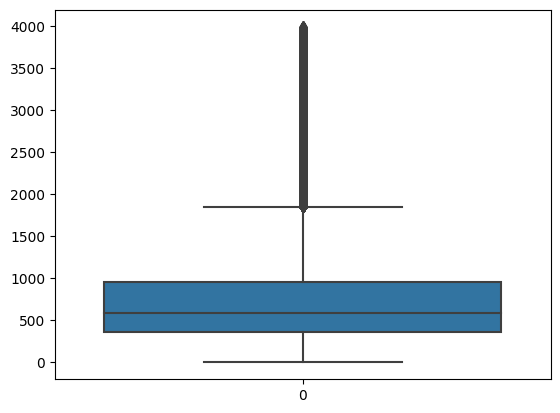

In [30]:
sns.boxplot(df.total_sec)

In [4]:
df.drop(df[df.total_sec>1400].index,inplace=True)

<AxesSubplot: >

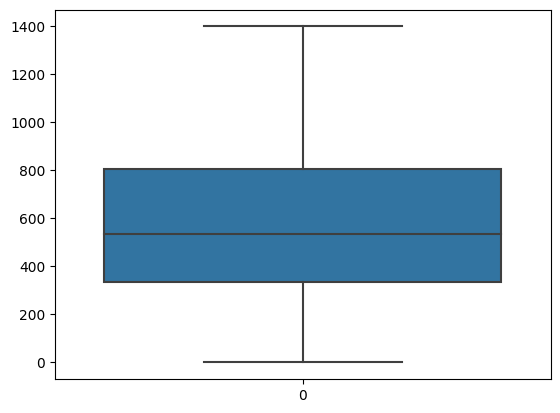

In [7]:
sns.boxplot(df.total_sec)

In [17]:
df.skew()

/tmp/ipykernel_48769/1665899112.py:1: FutureWarning: The default value of numeric_only in DataFrame.skew is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.skew()


VendorID             0.502689
passenger_count      2.234568
trip_distance        1.130366
RatecodeID         217.485487
PULocationID        -0.334594
DOLocationID        -0.355408
payment_type         0.960242
fare_amount          6.985231
total_amount        10.115936
total_sec            0.624796
PUmonth              0.000000
DOmonth              0.000000
PUhour              -0.480743
DOhour              -0.496481
dtype: float64

## Let us remove outliers from trip_distance

{'whiskers': [<matplotlib.lines.Line2D at 0x7efd8dfd5e70>,
 'caps': [<matplotlib.lines.Line2D at 0x7efd8dfd63b0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7efd8dfd5bd0>],
 'medians': [<matplotlib.lines.Line2D at 0x7efd8dfd68f0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7efd8dfd6b90>],
 'means': []}

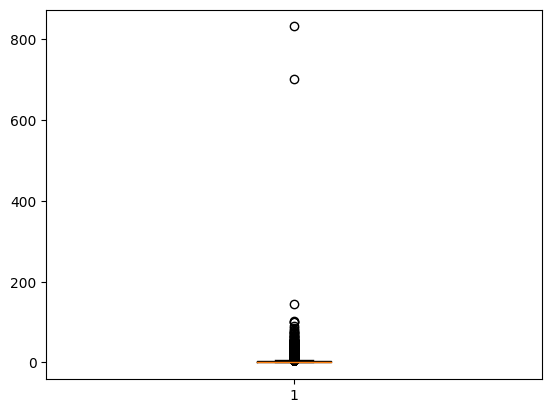

In [3]:
plt.boxplot(df.trip_distance)

As we can see having outliers are present. they will cause seeing actual histogram

In [20]:
df.drop(df[df.trip_distance>200].index,inplace=True)

{'whiskers': [<matplotlib.lines.Line2D at 0x7f1a93284580>,
 'caps': [<matplotlib.lines.Line2D at 0x7f1a93284ac0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f1a932842e0>],
 'medians': [<matplotlib.lines.Line2D at 0x7f1a93285000>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f1a932852a0>],
 'means': []}

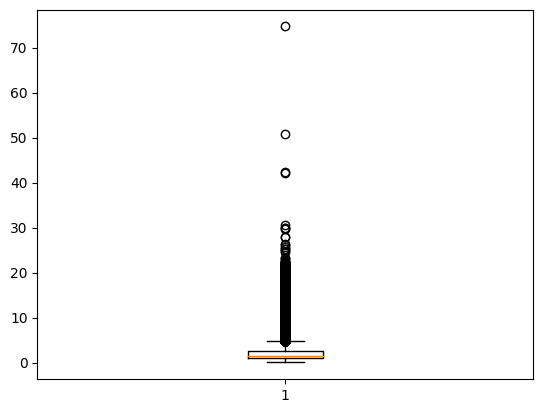

In [44]:
plt.boxplot(df.trip_distance)

In [15]:
df.drop(df[df.trip_distance>35].index,inplace=True)

{'whiskers': [<matplotlib.lines.Line2D at 0x7f1a93266e30>,
 'caps': [<matplotlib.lines.Line2D at 0x7f1a93267370>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f1a93266b90>],
 'medians': [<matplotlib.lines.Line2D at 0x7f1a932678b0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f1a93267b50>],
 'means': []}

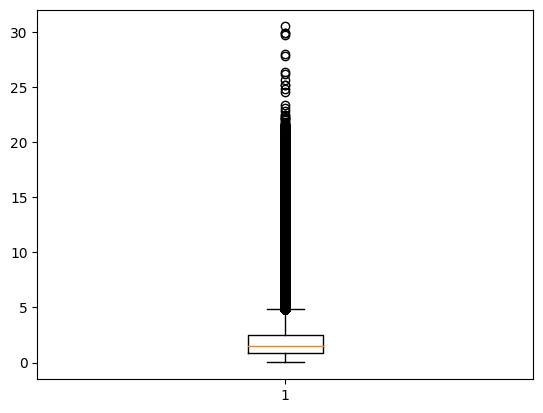

In [46]:
plt.boxplot(df.trip_distance)

In [8]:
df.drop(df[df.trip_distance>3.6].index,inplace=True)

In [9]:
len(df[df.trip_distance>5].trip_distance)/len(df.trip_distance)*100
#this many percnt of trips are outliers
#question is is this percent significant??

0.0

{'whiskers': [<matplotlib.lines.Line2D at 0x7f0b52ff58a0>,
 'caps': [<matplotlib.lines.Line2D at 0x7f0b52ff5de0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f0b52ff5600>],
 'medians': [<matplotlib.lines.Line2D at 0x7f0b52ff6320>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f0b52ff65c0>],
 'means': []}

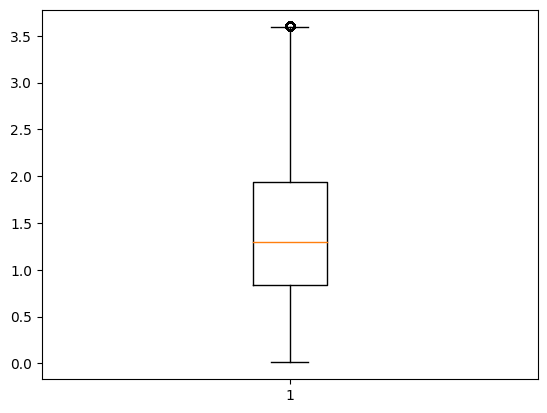

In [10]:
plt.boxplot(df.trip_distance)

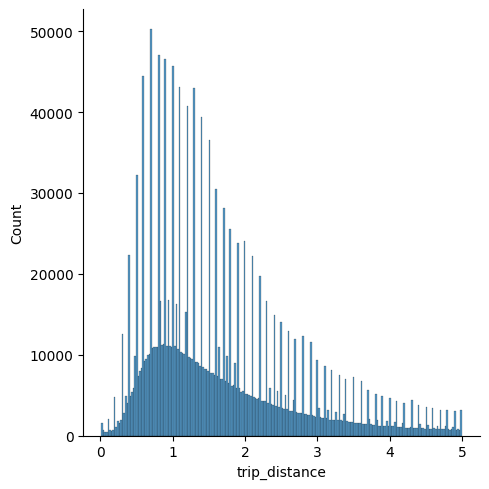

In [6]:
sns.displot(df.trip_distance)

In [34]:
df.skew()

/tmp/ipykernel_3976/1665899112.py:1: FutureWarning: The default value of numeric_only in DataFrame.skew is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.skew()


VendorID           0.474846
passenger_count    2.219126
trip_distance      2.960793
RatecodeID         9.789915
PULocationID      -0.271966
DOLocationID      -0.326209
payment_type       1.006703
fare_amount        2.716183
total_amount       2.888001
total_sec          1.794847
PUmonth            0.000000
DOmonth            0.000000
PUhour            -0.471062
DOhour            -0.491411
dtype: float64

## let us remove outliers from total_amount

<AxesSubplot: >

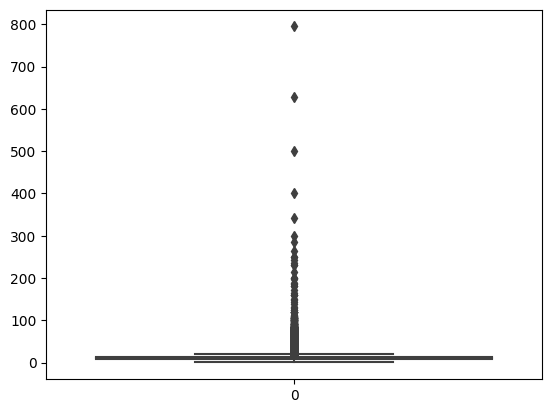

In [28]:
sns.boxplot(df.total_amount)

In [16]:
df.drop(df[df.total_amount>300].index,inplace=True)

<AxesSubplot: >

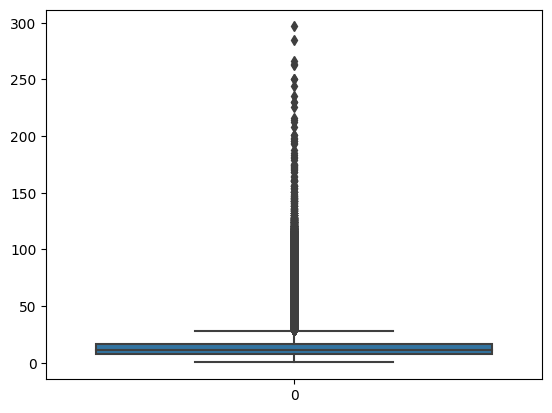

In [29]:
sns.boxplot(df.total_amount)

In [11]:
df.drop(df[df.total_amount>19].index,inplace=True)

<AxesSubplot: >

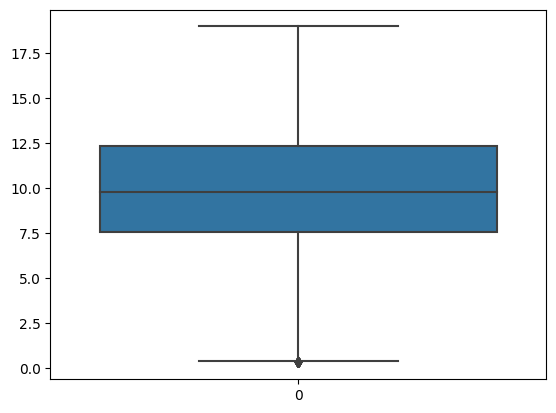

In [12]:
sns.boxplot(df.total_amount)

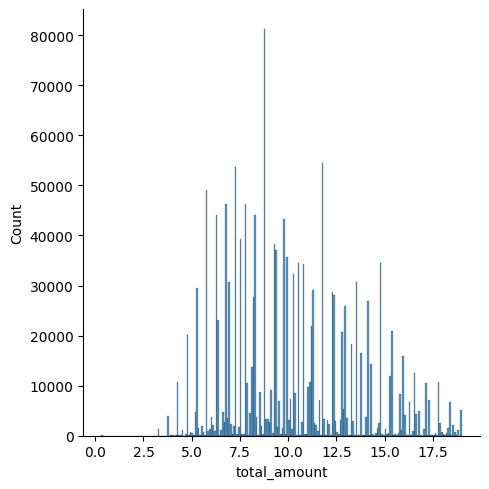

In [35]:
sns.displot(df.total_amount)

In [36]:
len(df[df.total_amount>35].total_amount)/len(df.total_amount)*100
#this many percnt of total_amount are outliers
#question is is this percent significant??

0.0

In [35]:
df.skew()

/tmp/ipykernel_3976/1665899112.py:1: FutureWarning: The default value of numeric_only in DataFrame.skew is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.skew()


VendorID           0.474846
passenger_count    2.219126
trip_distance      2.960793
RatecodeID         9.789915
PULocationID      -0.271966
DOLocationID      -0.326209
payment_type       1.006703
fare_amount        2.716183
total_amount       2.888001
total_sec          1.794847
PUmonth            0.000000
DOmonth            0.000000
PUhour            -0.471062
DOhour            -0.491411
dtype: float64

<AxesSubplot: >

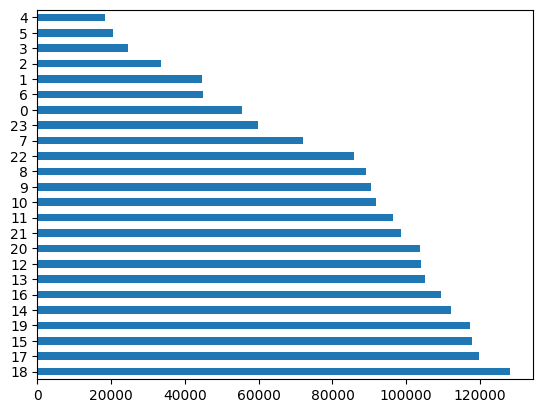

In [18]:
df.PUhour.value_counts().plot.barh()

### Day, Time, Month

<AxesSubplot: title={'center': 'Dropoff Days'}, xlabel='DOday', ylabel='count'>

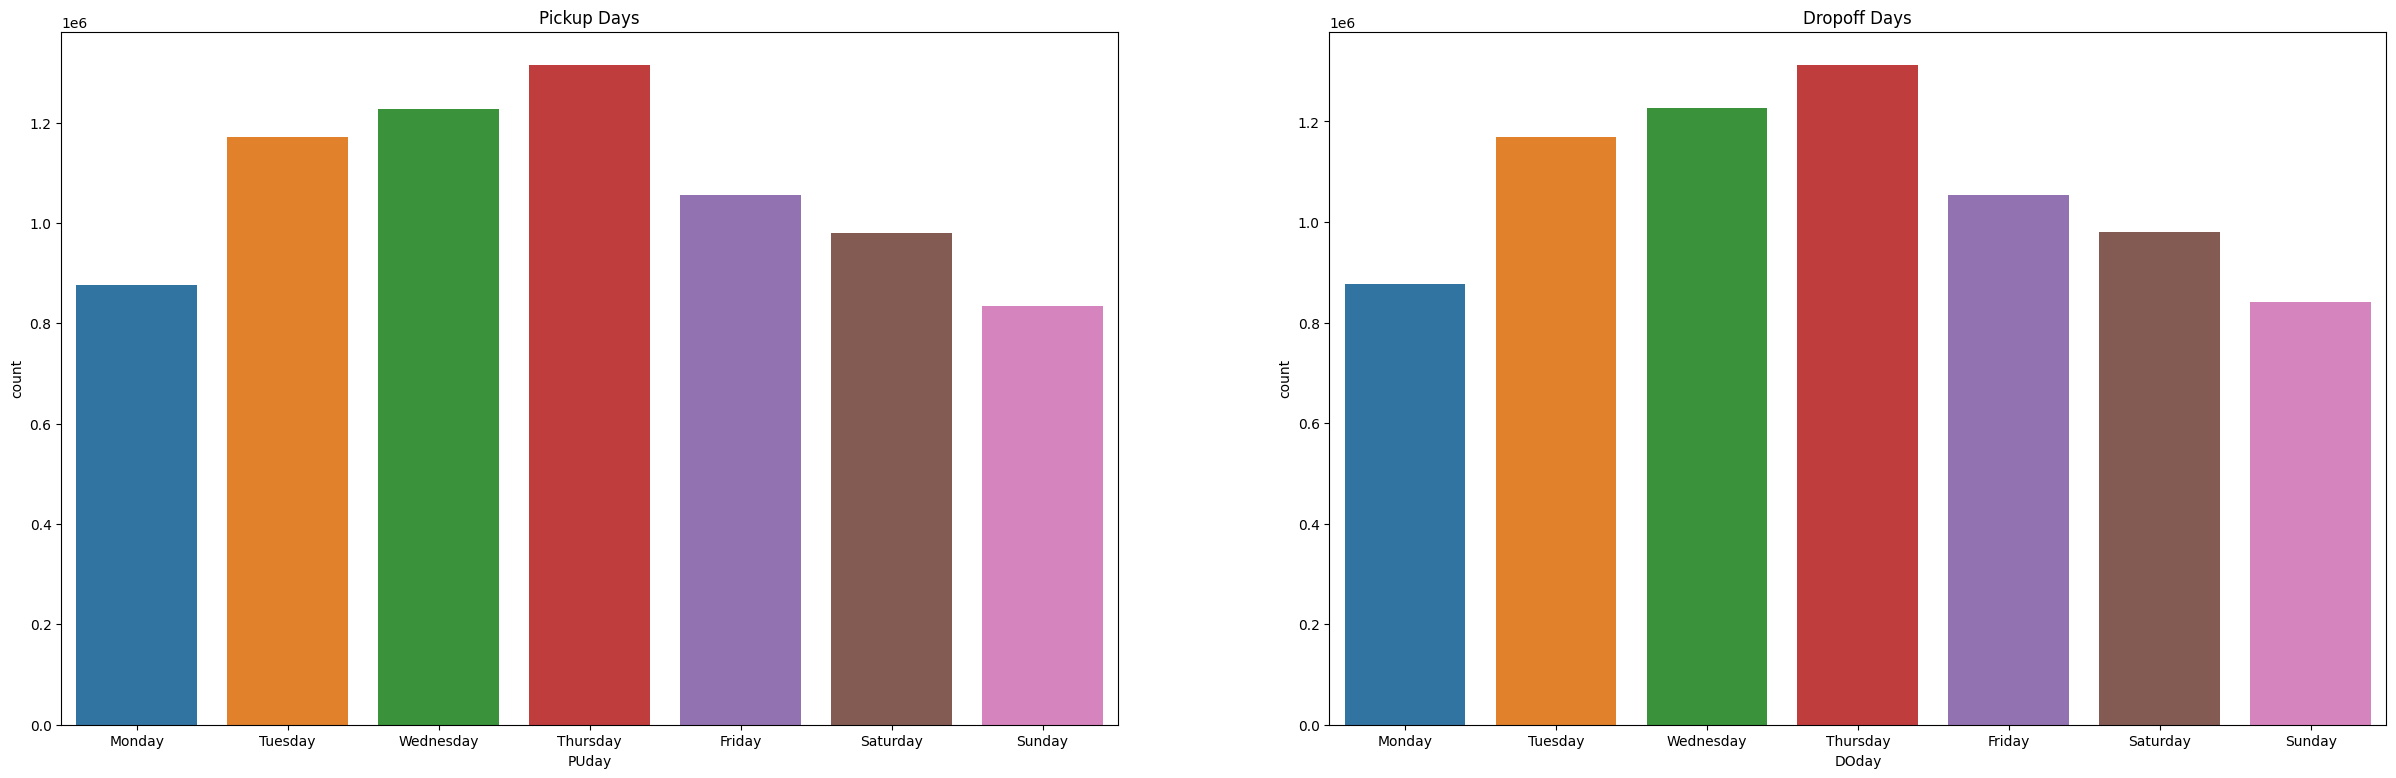

In [28]:
days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
fig, (ax1,ax2) = plt.subplots(ncols=2, figsize=(30,9))
ax1.set_title("Pickup Days")
sns.countplot(x='PUday', data=df, ax=ax1, order=days)
ax2.set_title("Dropoff Days")
sns.countplot(x='DOday', data=df, ax=ax2, order=days)

<AxesSubplot: title={'center': 'Dropoff time'}, xlabel='DOtime', ylabel='count'>

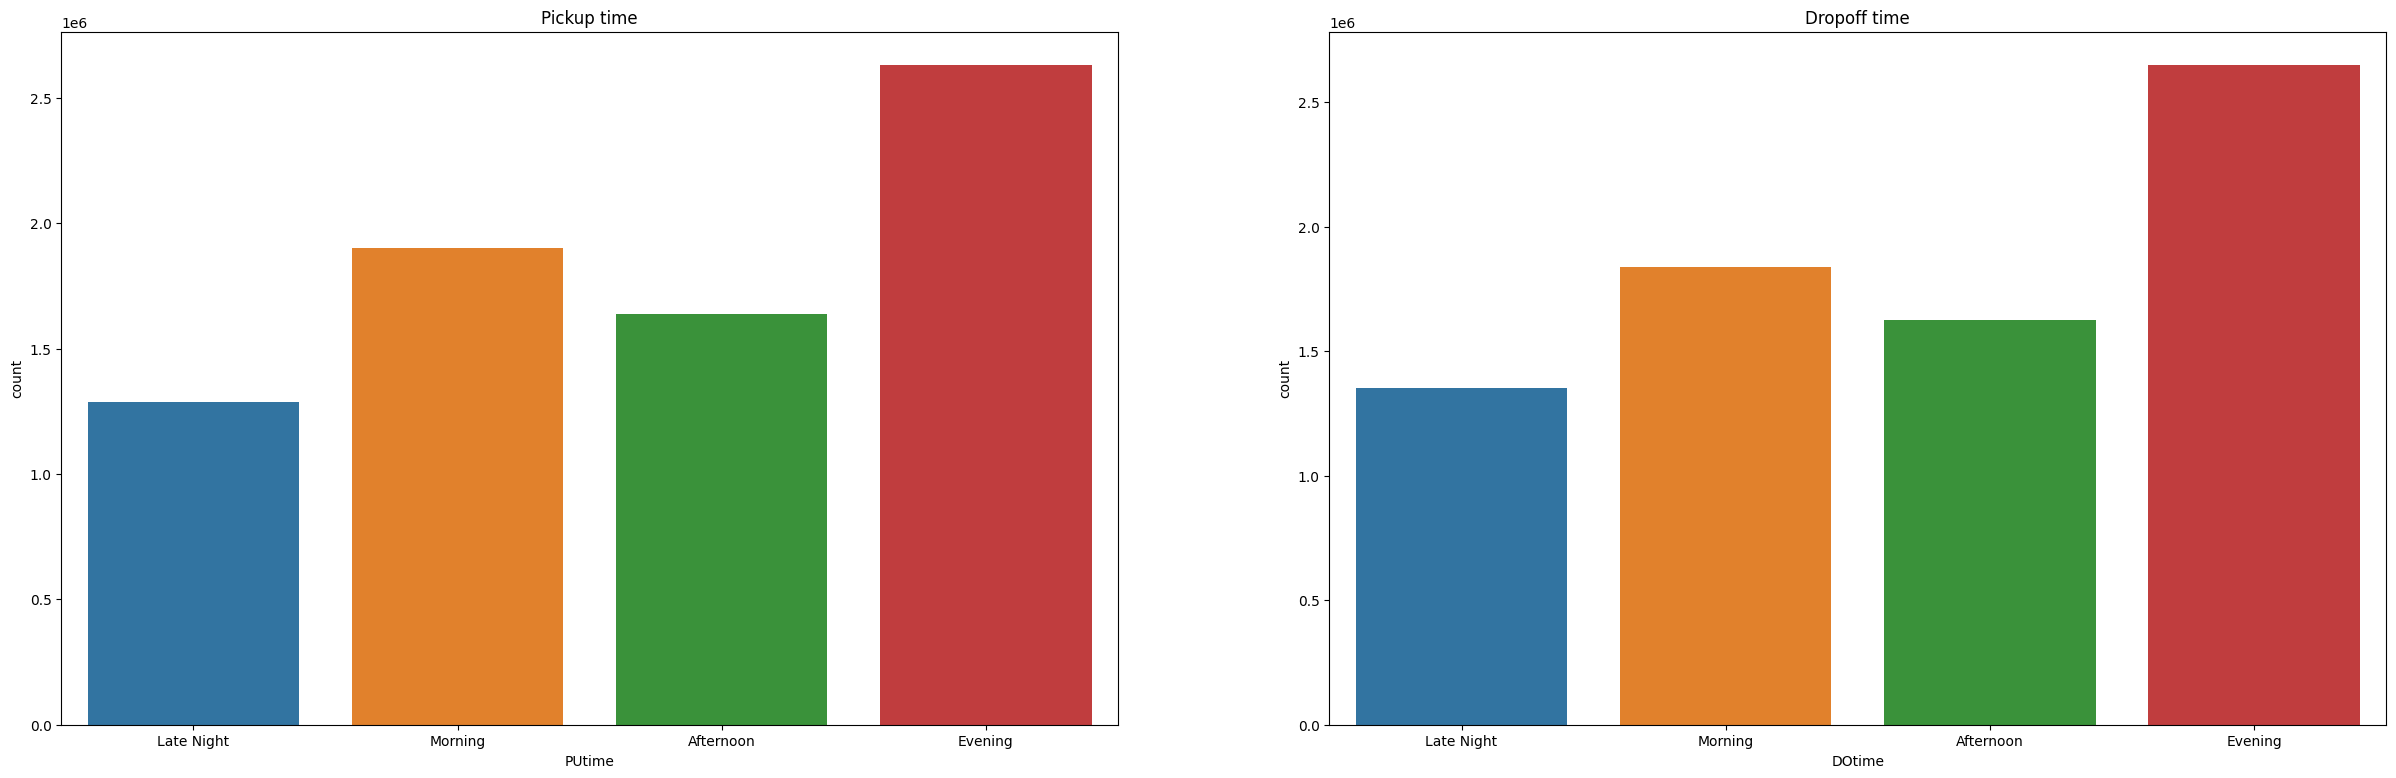

In [14]:
def Duration(x):
    if x in range(6,12):
        return 'Morning'
    elif x in range(12,16):
        return 'Afternoon'
    elif x in range(16,22):
        return 'Evening'
    else:
        return 'Late Night'
    

df['PUtime'] = df['PUhour'].apply(Duration)
df['DOtime'] = df['DOhour'].apply(Duration)


fig, (ax3,ax4) = plt.subplots(ncols=2, figsize=(30,9))
ax3.set_title("Pickup time")
sns.countplot(x='PUtime', data=df, ax=ax3)
ax4.set_title("Dropoff time")
sns.countplot(x='DOtime', data=df, ax=ax4)

# Bivariate analysis

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as  plt
from datetime import timedelta
import seaborn as sns

In [7]:
df = pd.read_pickle('pickled_parquet_1.pkl')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1943855 entries, 0 to 1999999
Data columns (total 24 columns):
 #   Column                 Dtype          
---  ------                 -----          
 0   VendorID               int64          
 1   tpep_pickup_datetime   datetime64[ns] 
 2   tpep_dropoff_datetime  datetime64[ns] 
 3   passenger_count        float64        
 4   trip_distance          float64        
 5   RatecodeID             float64        
 6   store_and_fwd_flag     object         
 7   PULocationID           int64          
 8   DOLocationID           int64          
 9   payment_type           int64          
 10  fare_amount            float64        
 11  total_amount           float64        
 12  total_sec              float64        
 13  duration               timedelta64[ns]
 14  PUmonth                int64          
 15  DOmonth                int64          
 16  PUday                  object         
 17  DOday                  object         
 18  PU

<AxesSubplot: xlabel='PUday', ylabel='count'>

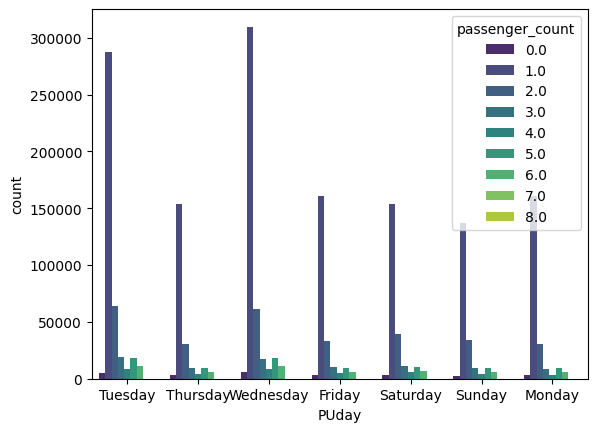

In [33]:
sns.countplot(x='PUday', hue='passenger_count', data=df, palette="viridis")

In [ ]:
z = df[['trip_distance','PULocationID']]
sns.sc(data=z,y='trip_distance',x='PULocationID',levels=5)

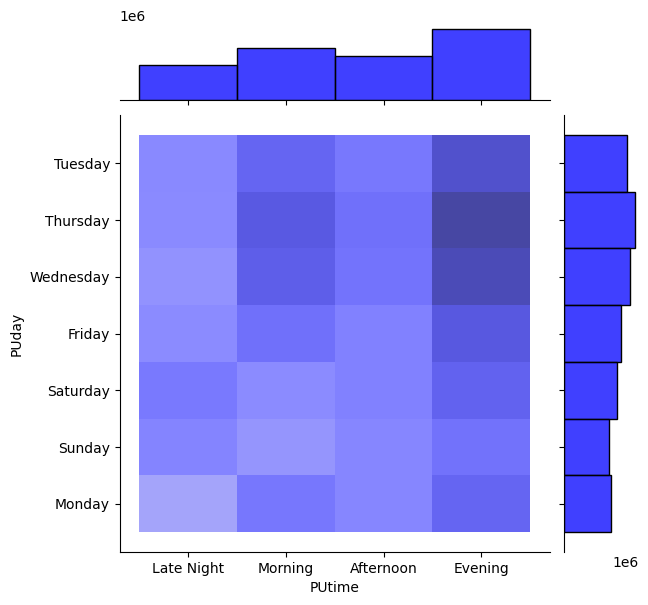

In [5]:
sns.jointplot(y='PUday',x='PUtime',data=df,kind='hist',color='blue')

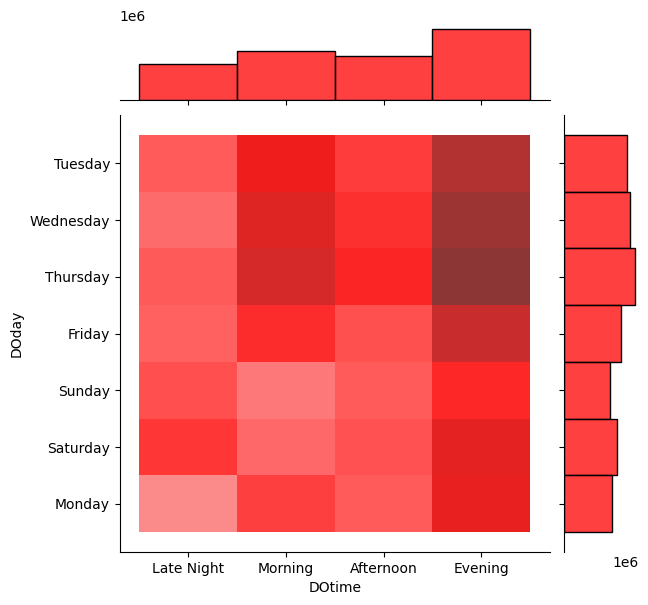

In [15]:
sns.jointplot(y='DOday',x='DOtime',data=df,kind='hist',color='red')


Pickup values > 10000 69
Dropoff values > 10000 95


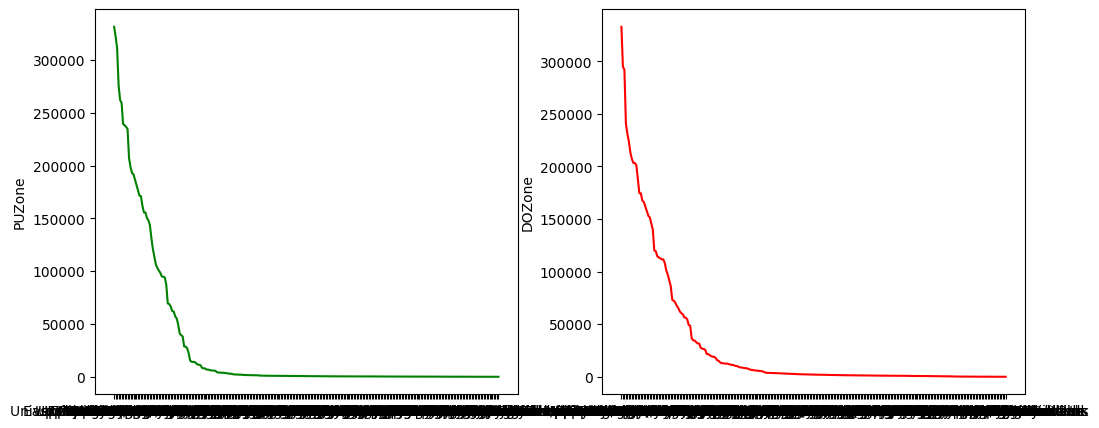

In [57]:
fig,(PUc,DOc) = plt.subplots(ncols=2,figsize=(12,5))
PUcount = df.PUZone.value_counts()
sns.lineplot(PUcount,color='Green',ax=PUc)
print("Pickup values > 10000",len(PUcount[PUcount>5000]))

DOcount = df.DOZone.value_counts()
sns.lineplot(DOcount,color='Red')
print("Dropoff values > 10000",len(DOcount[DOcount>5000]))


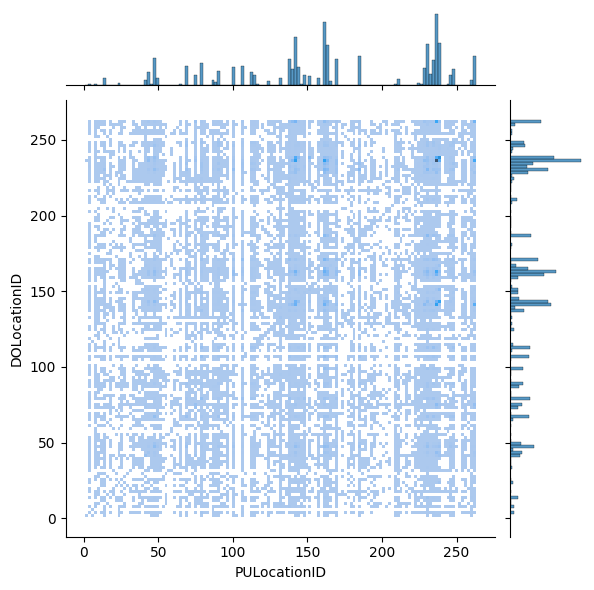

In [73]:
sns.jointplot(x=df.PULocationID, y=df.DOLocationID, kind='hist')

In [14]:
df1 = df[['passenger_count','trip_distance','total_amount','total_sec','PUhour','DOhour','PULocationID','DOLocationID']]

<AxesSubplot: >

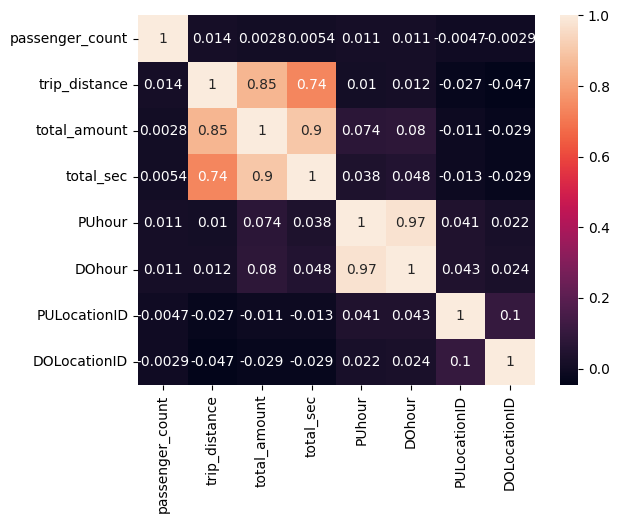

In [15]:
sns.heatmap(df1.corr(),annot=True)

In [ ]:
sns.pairplot(df)

#references


#https://pandas.pydata.org/docs/reference/api/pandas.Series.dt.year.html
#https://medium.com/analytics-vidhya/exploratory-data-analysis-nyc-taxi-price-prediction-using-python-44fce176a8fe